<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Дмитрий, доброго дня! рад приветствовать тебя) <br />

<br />    

<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<br> Я сразу же начал общаться на ты:) но если это не очень удобно, то дай знать)) <BR> В ПУТЬ!<br>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='blue'> <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
Привет, Николай! Спасибо за внимательное отношение к моему проекту и дополнительные вопросы. 
Попробовал ответить на них в самом конце. 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>Привет, Дмитрий! ОК, Спасибо) Пошёл смотреть....

# ЗАГРУЗКА И ОПИСАНИЕ ДАННЫХ

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
* сalls — количество звонков,
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений,
* mb_used — израсходованный интернет-трафик в Мб,
  is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)
  
***Цель проекта:*** Построить модель для задачи классификации, которая выберет подходящий тариф для каждого пользователя с accuracy не менее 0.75

Загрузим данные и необходимые библиотеки

In [1]:
import pandas 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
try:
    df=pd.read_csv('users_behavior.csv', sep=',') 
except: 
    df=pd.read_csv('/datasets/users_behavior.csv', sep=',')
    
pd.options.display.float_format = '{:.2f}'.format

In [2]:
display(df.head())

,calls,minutes,messages,mb_used,is_ultra
0,40.00,311.90,83.00,19915.42,0
1,85.00,516.75,56.00,22696.96,0
2,77.00,467.66,86.00,21060.45,0
3,106.00,745.53,81.00,8437.39,1
4,66.00,418.74,1.00,14502.75,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Выделим 20% данных для тестовой выборки

In [4]:
df_test=df.loc[2571:]
print(df_test.tail())

      calls  minutes  messages  mb_used  is_ultra
3209 122.00   910.98     20.00 35124.90         1
3210  25.00   190.36      0.00  3275.61         0
3211  97.00   634.44     70.00 13974.06         0
3212  64.00   462.32     90.00 31239.78         0
3213  80.00   566.09      6.00 29480.52         1


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
ОК, данные загружены.<br>
В этом проекте отрабатывается навык построения предсказательных моделей. И не требуется уделять много времени предобработке данных (пропуски, дубликаты), верно. Но вот провести анализ факторов, которые буду входить в модель было бы не плохо.

Скажем, если есть мультиколлинеаорность факторов (когда факторы модели имеют сильную связь друг с другом), то сразу можно один из факторов исключить.<br>

<font color='red'>
Попробуй сделать некоторые аналитические "раскопки" по мультиколлинеарности факторов)))<br>

# ОБУЧЕНИЕ МОДЕЛЕЙ

Определим признаки и целевой признак

In [5]:
features = df.loc[:2571].drop(['is_ultra'], axis=1)
target = df.loc[:2571]['is_ultra']

Разделим исходные данные на обучающую, валидационную и тестовую выборку

In [6]:
features_train, features_valid, target_train, target_valid = train_test_split(
features, target, test_size=0.20, random_state=12345)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
ОК, хорошо, здесь можно ещё проконтролировать размер новых выборок. Например командой shape

Обучим модель дерева решений с изменением глубины

In [7]:
best_model = None
best_result = 0
for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_train, target_train) 
    predictions_valid = model.predict(features_valid) 
    result = accuracy_score(target_valid, predictions_valid)
    print("max_depth =", depth, ": ", end='')
    print(result)
    if result > best_result:
        best_model = model
        best_result = result
print("Accuracy наилучшей модели на валидационной выборке:", best_result)

max_depth = 1 : 0.7165048543689321
max_depth = 2 : 0.7747572815533981
max_depth = 3 : 0.7864077669902912
max_depth = 4 : 0.7883495145631068
max_depth = 5 : 0.7825242718446602
max_depth = 6 : 0.7883495145631068
max_depth = 7 : 0.7883495145631068
max_depth = 8 : 0.7883495145631068
max_depth = 9 : 0.7883495145631068
max_depth = 10 : 0.7689320388349514
max_depth = 11 : 0.7475728155339806
max_depth = 12 : 0.7456310679611651
max_depth = 13 : 0.7184466019417476
max_depth = 14 : 0.7165048543689321
max_depth = 15 : 0.7165048543689321
max_depth = 16 : 0.7029126213592233
max_depth = 17 : 0.7067961165048544
max_depth = 18 : 0.7067961165048544
max_depth = 19 : 0.6970873786407767
max_depth = 20 : 0.6970873786407767
max_depth = 21 : 0.6970873786407767
max_depth = 22 : 0.6932038834951456
max_depth = 23 : 0.6951456310679611
max_depth = 24 : 0.6873786407766991
max_depth = 25 : 0.6873786407766991
max_depth = 26 : 0.6873786407766991
max_depth = 27 : 0.6873786407766991
max_depth = 28 : 0.6873786407766991
m

### Вывод 1:### 
Модель дерева решений может давать предсказания с достаточно высокой долей правильных ответов. 
Максимальное ***accuracy равное 0.788*** достигнуто для глубины равной 4. При увеличении глубины
точность предсказания падает

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
Отлично, есть кандидат на победителя)

Обучим модель случайный лес

In [8]:
best_model = None
best_result = 0
for est in range(1, 40):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_train, target_train) 
    predictions_valid = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions_valid)
    print("max_est =", est, ": ", end='')
    print(result)
    if result > best_result:
        best_model = model
        best_result = result

print("Accuracy наилучшей модели на валидационной выборке:", best_result)


max_est = 1 : 0.6932038834951456
max_est = 2 : 0.7223300970873786
max_est = 3 : 0.7300970873786408
max_est = 4 : 0.7475728155339806
max_est = 5 : 0.7592233009708738
max_est = 6 : 0.7650485436893204
max_est = 7 : 0.7611650485436893
max_est = 8 : 0.7669902912621359
max_est = 9 : 0.7611650485436893
max_est = 10 : 0.7747572815533981
max_est = 11 : 0.7631067961165049
max_est = 12 : 0.7689320388349514
max_est = 13 : 0.7650485436893204
max_est = 14 : 0.7747572815533981
max_est = 15 : 0.7689320388349514
max_est = 16 : 0.7766990291262136
max_est = 17 : 0.7747572815533981
max_est = 18 : 0.7766990291262136
max_est = 19 : 0.7786407766990291
max_est = 20 : 0.7825242718446602
max_est = 21 : 0.7883495145631068
max_est = 22 : 0.7844660194174757
max_est = 23 : 0.7883495145631068
max_est = 24 : 0.7941747572815534
max_est = 25 : 0.7922330097087379
max_est = 26 : 0.7902912621359224
max_est = 27 : 0.7941747572815534
max_est = 28 : 0.7902912621359224
max_est = 29 : 0.7902912621359224
max_est = 30 : 0.788349

### Вывод 2:### 
Модель случайного леса с глубиной равной 1 может давать предсказания немного точнее чем дерево решений.
Максимальное ***accuracy равное 0.794*** достигнуто для количества деревьев равное 27. При увеличении количества деревьев 
точность предсказания падает

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
И этот - не подкачал)

Обучим модель случайный лес с изменением глубины

In [9]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(1, 20, 1):
    for depth in range (1, 30):
        for samples_split in range (2, 4):
            for samples_leaf in range (1, 4):
                model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth, min_samples_split=samples_split,
                                     min_samples_leaf=samples_leaf)
                model.fit(features_train, target_train ) 
                result = model.score(features_valid, target_valid)
                print("max_est =", est, "max_depth =", depth, ": ", end='')
                print(result)
                if result > best_result:
                    best_model = model
                    best_result = result
                    best_est = est
                    best_depth = depth
print("Accuracy наилучшей модели на валидационной выборке:", 
      best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth, "Количество деревьев:", 
      "Минимальное количество примеров для разделения:", samples_split,
     "Минимальное количество объектов в листе:", samples_split)

max_est = 1 max_depth = 1 : 0.13289967494755028
max_est = 1 max_depth = 1 : 0.13289967494755028
max_est = 1 max_depth = 1 : 0.13289967494755028
max_est = 1 max_depth = 1 : 0.13289967494755028
max_est = 1 max_depth = 1 : 0.13289967494755028
max_est = 1 max_depth = 1 : 0.13289967494755028
max_est = 1 max_depth = 2 : 0.21481876536458266
max_est = 1 max_depth = 2 : 0.21481876536458266
max_est = 1 max_depth = 2 : 0.21481876536458266
max_est = 1 max_depth = 2 : 0.21481876536458266
max_est = 1 max_depth = 2 : 0.21481876536458266
max_est = 1 max_depth = 2 : 0.21481876536458266
max_est = 1 max_depth = 3 : 0.2312044711851846
max_est = 1 max_depth = 3 : 0.2312044711851846
max_est = 1 max_depth = 3 : 0.2312044711851846
max_est = 1 max_depth = 3 : 0.2312044711851846
max_est = 1 max_depth = 3 : 0.2312044711851846
max_est = 1 max_depth = 3 : 0.2312044711851846
max_est = 1 max_depth = 4 : 0.23431652043610166
max_est = 1 max_depth = 4 : 0.24900877395402
max_est = 1 max_depth = 4 : 0.24900877395402
max_

### Вывод 3:### 
Модель случайного леса с изменением глубины работает хуже чем просто модель случайного леса.
Максимальное ***accuracy равное 0.33*** достигнуто для количества деревьев равное 7 и глубиной 29. 
При увеличении количества деревьев и глубины точность предсказания падает

Обучим модель логистической регрессии

In [10]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train) 
result = model.score(features_valid, target_valid) 

print("Accuracy модели логистической регрессии на валидационной выборке:", result)

Accuracy модели логистической регрессии на валидационной выборке: 0.654368932038835


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Вывод 4:### 
Модель логистической регрессии работает хуже чем модель случпйного леса и дерева решений.
Максимальное качество - ***accuracy равное 0.71*** 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
Не боец - логистическая)

# СРАВНЕНИЕ КАЧЕСТВА МОДЕЛЕЙ НА ТЕСТОВОЙ ВЫБОРКЕ

Проверим предсказания модели дерева решений на тестовой выборке

In [11]:
features_test = df_test.drop(['is_ultra'], axis=1)
target_test =  df_test['is_ultra']

In [12]:
features_test, features_test_valid, target_test, target_test_valid = train_test_split(
features, target, test_size=0.20, random_state=12345)

In [13]:
model = DecisionTreeClassifier(random_state=12345, max_depth=4) 
model.fit(features_test, target_test) 
predictions_valid = model.predict(features_test_valid) 
result = accuracy_score(target_test_valid, predictions_valid)
print("Accuracy наилучшей модели на валидационной выборке:", result)

Accuracy наилучшей модели на валидационной выборке: 0.7883495145631068


Проверим предсказания модели случайного леса на тестовой выборке

In [14]:
model = RandomForestClassifier(random_state=12345, n_estimators=27) 
model.fit(features_test, target_test) 
predictions_valid = model.predict(features_test_valid)
result = accuracy_score(target_valid, predictions_valid)
print("Accuracy наилучшей модели на валидационной выборке:", result)

Accuracy наилучшей модели на валидационной выборке: 0.7941747572815534


### Вывод 5:### 
Модель дерева решений показала лучший результат на тестовой выборке.
Максимальное качество - ***accuracy равное 0.788*** 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
ОТЛИЧНО, есть победитель)

# ЗАКЛЮЧИТЕЛЬНЫЙ ВЫВОД#

* Лучшей моделью для рекомендации пользователям тарифа является модель дерева решений с глубиной 4. 
* Accuracy наилучшей модели на валидационной выборке: 0.7883495145631068

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font><br>
<font color='green'><br>Дмитрий, хорошая модельная раота на этом спринте, уверенное движение)<br>
Оценил данные для модели, провел разносторннюю модельную работу с перебором параметров - ничего не забыто <br>
Метрики рассчитаны и выведены понятно и логично. Что ещё надо ревьеру для полного счастья))<br>
И видно, что проделана рабочая аналитическая работа.<br><br>
    
Этот проект - только начало моделирования. Дальше, конечно же, информация и скилы будут нарастать. <br>
Попробую изложить своё видение поиска моедли для прогнозирования чего-либо.<br>
Нучну с того, то у нас (у модели) есть цель: максимально точно описать поведение изучаемого процесса(объекта), чтобы предсказать его (объекта) поведение в будущем.<br> например поведение клиента или продажи в четверг на следующей неделе.<br>
Описать поведение можно с помощью математической формулы.<br>
И всё искусство аналитика - создать такую формулу-модель.<br>
На точность поиска формулы влияют три группы причин:<br>
1) тип модели: ты их как раз и перебираешь. Заранее не всегда можно сказать какая модель именно для конкретных данных подходит. Нужно пробовать, анализировать.<br>
2) гиперпараметры модели: =По умолчанию их выставляют оптимальными (в моделях их может быть десятки). И некоторые вот надо подбирать пребором -стараться улучшит. Причём границы - не известны. Понятно только, что надо стараться, чтобы их было меньше. Как в технике: чем проще изделие - тем меньше ломается) Чем проще модель, тем понянее.<br> Хотя сейчас новая эра настала: На одной из лекций DS-гуру я услышал как-то такие слова: "а не важно, как машина подобрала параметры, важно что она не ошиблась" Это был человек (фамилию забыл) близкий к разработкам гугла и яндекса. Страшные слова. Но это факт.<br>
3) Внешние факторы для моделей: это то, что звонки, минуты.... С этим понятно. 
    
Вот, три группы возможностей создать хорошую модель. И каждым из них надо владеть DS-специалисту. В этом проекте, одна из целей - первичное знакомство с возможностями гиперпараметров.<br><br>
 
Если возвращаться к проекту ещё, то пару моментов зафиксировал бы, чтобы будущие проеты можно было ещё улучшить:<br>
1) Более глубокое предварительное исследование факторов: основная цель: понять философию факторов, которые мы хотим использовать для моделирования. Предварительная аналитика сможет улучшить модель и сделать её более устойчивой. Например, минуты и зывонки - мультиколлинеарны. <br><br>
    
<font color='red'>
Что ещё лучше сделать в этой работе:<br>    
Добавь, пожалуйста, корреляционный анализ факторов (найти корреляции между числовыми факторами и построить график скатерплот), чтобы выявить мультиколлинеарность факторов и принять решение о включении в модель<br>
<font color='green'>   
<br>Спасибо)<br>Буду ждать)
</b></font>

Проведем корреляционный анализ факторов

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80ec467290>,
      dtype=object)

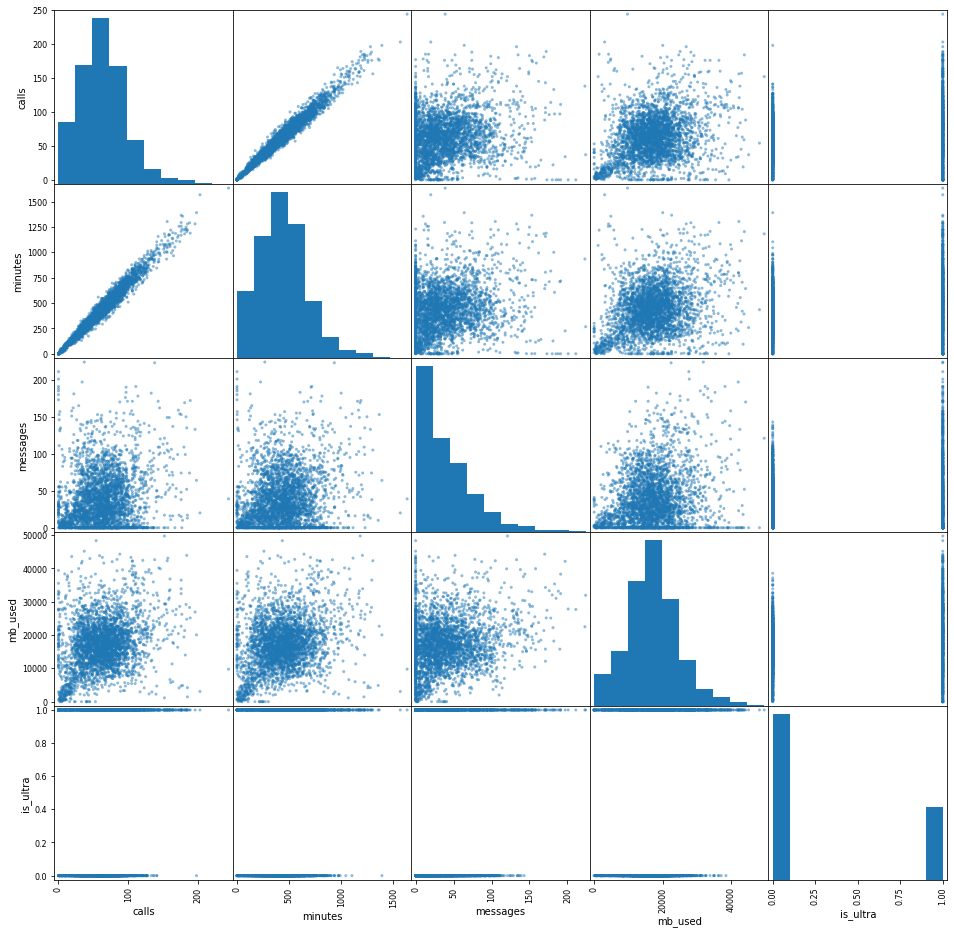

In [15]:
pd.plotting.scatter_matrix(df, figsize = (16, 16))

In [16]:
print(df['calls'].corr(df['minutes']))

0.9820832355742293


Как видно из графика корреляция между звонками и минутами близка к единице, а точенее равна 0.98, поэтому для анализа в данных 
можно оставить только столбец со звонками. Поробуем посмотреть, как измениться решение после этого. 

In [17]:
df2=df.drop(['minutes'], axis=1)
df2.head()


,calls,messages,mb_used,is_ultra
0,40.00,83.00,19915.42,0
1,85.00,56.00,22696.96,0
2,77.00,86.00,21060.45,0
3,106.00,81.00,8437.39,1
4,66.00,1.00,14502.75,0


In [18]:
df2_test=df2.loc[2571:]
print(df2_test.tail())

      calls  messages  mb_used  is_ultra
3209 122.00     20.00 35124.90         1
3210  25.00      0.00  3275.61         0
3211  97.00     70.00 13974.06         0
3212  64.00     90.00 31239.78         0
3213  80.00      6.00 29480.52         1


In [19]:
features_test_2 = df2_test.drop(['is_ultra'], axis=1)
target_test_2 = df2_test['is_ultra']

In [20]:
features_test_2, features_test_valid_2, target_test_2, target_test_valid_2 = train_test_split(
features, target, test_size=0.20, random_state=12345)

In [21]:
model = DecisionTreeClassifier(random_state=12345, max_depth=4) 
model.fit(features_test_2, target_test_2) 
predictions_valid = model.predict(features_test_valid_2) 
result = accuracy_score(target_test_valid_2, predictions_valid)
print("Accuracy наилучшей модели на валидационной выборке:", result)

Accuracy наилучшей модели на валидационной выборке: 0.7883495145631068


In [22]:
model = RandomForestClassifier(random_state=12345, n_estimators=27) 
model.fit(features_test_2, target_test_2) 
predictions_valid = model.predict(features_test_valid_2)
result = accuracy_score(target_test_valid_2, predictions_valid)
print("Accuracy наилучшей модели на валидационной выборке:", result)

Accuracy наилучшей модели на валидационной выборке: 0.7941747572815534


Точность предсказания модели никак не изменилось, но вероятно скорость работы увеличилась. 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>
Мы убираем мультиколлинеарный фактор не для увеличения точности модели. Наоборот: когда убираешь фактор - метрика может становится чуть хуже. Дело в другом: модель становится более устойчивой в работе и меньше скорость расчёта. Но первое на много важнее. Там внутри расчётов, когда факторы мультиколлинеарны, возникает проблемка с матрицами.. и модели прохидится её решать дополнительно... В общем в данном случае НЕ нужно опиарться на метрику. Обнаружил мультиколлинеарность - удалил фактор. И точка) Можно лишь по упражняться, какой из них лучше убрать... это согласен))<br>
    
ОК, в общем-то, ты сделал все доработки)<br>
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font><br>
<font color='green'><br>
По дополнительной задаче по адекватности: <br>
Под адекватностью можно понимать ещё и так: наша модель лучше для бизнеса, чем вообще без модели? <br>
Т.е. СТоит вкладываться в DS или можно позвать "деда Васю" и он так, на глаз...<br>
Когда модель прогнозирует колличественный параметр, например продажи в штуках, то модель сравнивают со средними продажами. Типа в среднем у нас продажи столько-то единиц товара будет завтра. Ну и сравнивают с предсказанием модели.<br>
Когда модель предсказывает количесвто угадывания, как в данном проекте, то считают просто количество по выборке<br>
    
Ну вот например такая команда<br>
df['is_ultra'].value_counts() / df.shape[0]<br>
    
покажет какая будет точность наличия 0.<br>
И тут идёт сравнение: если точность модели > вот этой константной (нулевой), то значит модель лучше предсказывает и она адекватна для использования<br>

In [25]:
print(df['is_ultra'].value_counts() / df.shape[0])

0   0.69
1   0.31
Name: is_ultra, dtype: float64


Проверим модель на адекватность 

In [27]:
features_1 = df.drop(['is_ultra'], axis=1)
target_1 = df['is_ultra']

In [34]:
model = RandomForestClassifier(random_state=12345, n_estimators=27) 
model.fit(features_train, target_train) 
predictions= model.predict(features_1)
print("количество предсказания тарифа СМАРТ:", 1-sum(predictions)/len(df))

количество предсказания тарифа СМАРТ: 0.7174859987554449


Модель рекомендует тариф СМАРЬ большему количеству людей, но не разница не очень большая. Видимо нужно считать рентабельность 
на ее внедрение и тогда уже принимать решение. 